In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Import Toronto School Rating and Housing Pricing 
home_sales= pd.read_csv("toronto_api_postal_combined and filtered with price range 100K to 10M.csv")
schoolc_rating= pd.read_csv("toronto_catholic_schools.csv")
schoolc_rating.head()

,SCHOOL NAME,ADDRESS,CITY,POSTAL CODE,FSA,RANK (OUT OF 3046),RATINGS
0,St Barnabas,30 Washburn Way,Scarborough,M1B 1H3,M1B,1921,5.6
1,St Bede,521 Sewells Road,Scarborough,M1B 5H3,M1B,2100,5.3
2,St Columba,10 John Tabor Trail,Scarborough,M1B 1M9,M1B,2711,3.8
3,St Dominic Savio,50 Tideswell Blvd.,Scarborough,M1B 5X3,M1B,1470,6.2
4,St Florence,101 Murison Boulevard,Scarborough,M1B 2L6,M1B,1470,6.2


In [7]:
# Clean Housing Pricing data frame so that pricing is average by FSA
home_sales_fsa=home_sales[["FSA","Price ($)"]]
home_sales_fsa=home_sales_fsa.groupby("FSA").mean().round()
home_sales_fsa=home_sales_fsa.drop(['L1A', 'L3T','L4C','L4J'])
home_sales_fsa.head()

,Price ($)
FSA,
M1B,516127.0
M1C,945254.0
M1E,619287.0
M1G,655781.0
M1H,497626.0


In [9]:
#Clean School Data to only have FSA & Ranking
Schoolc_fsa=schoolc_rating[["FSA","RATINGS"]]
Schoolc_fsa=Schoolc_fsa.groupby("FSA").mean()
Schoolc_fsa.head()

,RATINGS
FSA,
M1B,5.80
M1C,7.05
M1E,5.55
M1G,4.95
M1H,6.25


In [10]:
# Combine Data Frames on FSA-
combined_FSA_df = pd.merge(home_sales_fsa,Schoolc_fsa, on='FSA')
combined_FSA_df.rename(columns={'Price ($)':'Prices'}, inplace=True)
combined_FSA_df.head()

,Prices,RATINGS
FSA,,
M1B,516127.0,5.80
M1C,945254.0,7.05
M1E,619287.0,5.55
M1G,655781.0,4.95
M1H,497626.0,6.25


In [11]:
#Create Data points for Scatterplot
x_axis= combined_FSA_df['RATINGS'].tolist()
x_axis= list(map(float, x_axis))

y_axis= combined_FSA_df['Prices'].tolist()
y_axis= list(map(float, y_axis))

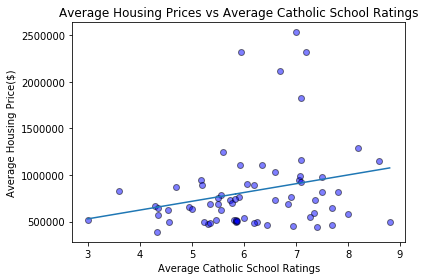

In [19]:
#Build Scatterplot graph
plt.scatter(x_axis, y_axis, alpha=0.5,marker="o", facecolors="blue", edgecolors="black")
plt.plot(np.unique(x_axis), np.poly1d(np.polyfit(x_axis, y_axis, 1))(np.unique(x_axis)))
plt.title("Average Housing Prices vs Average Catholic School Ratings")
plt.xlabel("Average Catholic School Ratings")
plt.ylabel("Average Housing Price($)")
plt.tight_layout()

In [17]:
plt.savefig('Graphs/HPvsCS.png')

<Figure size 432x288 with 0 Axes>